# Энергия ферромагнетика 3D (2024)

### Условие задачи

**Дано:**
- трехмерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y \times L_z$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{L_x L_y L_z}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8], L_y = 2, L_z = 2$
    - температурах $kT \in [1.0, 10.0]$ с шагом $0.2$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $L_x$ или по $kT$
- вывести нормированные значения средней энергии на экран (см. пример в разделе Проверка корректности результатов)
- отобразить **цветовую карту**, используя сохраненный массив:
    - ось абсцисс (`x`) - $L_x$,
    - ось ординат (`y`) - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{L_x L_y L_z}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $L_x, kT$.
- отобразить **график**, используя сохраненный массив:
  - при $L_x = 4$
  - ось абсцисс (`x`) - $k T$
  - ось ординат - нормированное значение средней энергии $\frac{\langle E \rangle}{L_x L_y L_z}$
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения; cм. [docstring-formats](https://realpython.com/documenting-python-code/#docstring-formats)   

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы.

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым).
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.

Средняя энергия системы
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$

**Трехмерный случай**

В случае трехмерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом:
$$E(\sigma) = -\sum_{i,j,k} J_{ijk}(\sigma_{i,j,k}\sigma_{i+1,j,k} + \sigma_{i,j,k}\sigma_{i,j+1,k} + \sigma_{i,j,k}\sigma_{i,j,k+1})$$

**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 10.0]$:

- для $L_x=4$

```
 -2.9999245  -2.99942704 -2.99751294 -2.99234641 -2.98120832 -2.96055993
 -2.92624559 -2.8739877  -2.80028775 -2.70359717 -2.58527526 -2.4497323
 -2.30352171 -2.15378271 -2.00677809 -1.86706074 -1.73733502 -1.61876535
 -1.51143987 -1.41479962 -1.32795939 -1.24991655 -1.17967258 -1.11629579
 -1.05894797 -1.00689072 -0.9594814  -0.91616422 -0.87645988 -0.8399552
 -0.80629365 -0.77516695 -0.74630779 -0.71948375 -0.69449204 -0.67115517
 -0.64931722 -0.62884085 -0.6096046  -0.5915008  -0.57443364 -0.55831768
 -0.54307645 -0.52864137 -0.51495073 -0.50194891
```

- для $L_x=5$

```
 -2.99992424 -2.99942279 -2.99747931 -2.99217771 -2.98058943 -2.95875848
 -2.92188438 -2.86496311 -2.78406936 -2.67801634 -2.54952834 -2.40498666
 -2.25267579 -2.10053598 -1.95459576 -1.81851387 -1.69392282 -1.58106528
 -1.47938363 -1.38794061 -1.30567554 -1.2315422  -1.16457336 -1.10390466
 -1.04877746 -0.99853208 -0.95259735 -0.91047935 -0.8717507  -0.83604105
 -0.8030287  -0.77243351 -0.74401083 -0.71754637 -0.69285189 -0.66976157
 -0.64812887 -0.62782395 -0.60873144 -0.59074855 -0.57378347 -0.55775396
 -0.5425862  -0.52821375 -0.51457668 -0.5016208
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)
- [docstring-formats](https://realpython.com/documenting-python-code/#docstring-formats)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x \times L_y \times L_z$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - не построена график - 10
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [ ]:
import numpy as np
from numba import njit
from typing import List
from itertools import product
from math import exp
import time
import matplotlib.pyplot as plt

In [ ]:
@njit
def binary_repr(
    x: int,
    L: int,
    map01: np.ndarray = np.array([-1, 1])
) -> np.ndarray:
    """
    Создает массив sigma. Функция как бы преобразует число x(порядковый номер массива) в массив длины L, где каждый бит числа x отображается
    согласно массиву map01

    Функция принимает целое число x, представляет его в двоичном формате
    длиной L, и преобразует каждый бит (0 или 1) в соответствующее значение
    из массива map01. По умолчанию, 0 отображается в -1, а 1 в 1

    Параметры:
    ----------
    x : int Целое число, которое нужно преобразовать в массив
    L : int Длина  массива
    map01 : np.ndarray Массив длины 2. По умолчанию: [-1, 1]

    Возвращает:
    ----------
    np.ndarray Массив длины L с элементами map01, соответствующими битам числа x(0 отображается в -1, а 1 в 1)

    Пример:
    -------
    >>> binary_repr(1, 5)
   (-1, -1, -1, -1, 1)

    """
    arr = np.zeros(L, dtype=np.int8)
    for i in range(L):
        j = L - i - 1
        arr[j] = map01[x & 1]
        x >>= 1
    return arr


In [ ]:
for x in range(16):
    print(x, binary_repr(x, 5))

0 [-1 -1 -1 -1 -1]
1 [-1 -1 -1 -1  1]
2 [-1 -1 -1  1 -1]
3 [-1 -1 -1  1  1]
4 [-1 -1  1 -1 -1]
5 [-1 -1  1 -1  1]
6 [-1 -1  1  1 -1]
7 [-1 -1  1  1  1]
8 [-1  1 -1 -1 -1]
9 [-1  1 -1 -1  1]
10 [-1  1 -1  1 -1]
11 [-1  1 -1  1  1]
12 [-1  1  1 -1 -1]
13 [-1  1  1 -1  1]
14 [-1  1  1  1 -1]
15 [-1  1  1  1  1]


In [ ]:
@njit
def roll_3d(arr: np.ndarray, shift: int, axis: int) -> np.ndarray:
    """
    Выполняет сдвиг трехмерного массива вдоль указанной оси

    Функция принимает трехмерный массив arr и выполняет циклический сдвиг
    элементов вдоль заданной оси (0, 1 или 2) на величину shift
    Используется для реализации периодических граничных условий

    Параметры:
    ----------
    arr : np.ndarray Трехмерный массив,элементы которого будем сдвигать
    shift : int  Величина сдвига
    axis : int  Ось, вдоль которой сдвигаем

    Возвращает:
    ----------
    np.ndarray Новый массив со сдвинутыми элементами

    Пример:
    -------
    >>> arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
    >>> roll_3d(arr, 1, axis=0)
    array([[[5, 6],
        [7, 8]],

       [[1, 2],
        [3, 4]]])
    """
    res = np.empty_like(arr)
    if axis == 0:
        for j in range(arr.shape[1]):
            for k in range(arr.shape[2]):
                res[:, j, k] = np.roll(arr[:, j, k], shift)
    elif axis == 1:
        for i in range(arr.shape[0]):
            for k in range(arr.shape[2]):
                res[i, :, k] = np.roll(arr[i, :, k], shift)
    elif axis == 2:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                res[i, j] = np.roll(arr[i, j], shift)
    return res


In [ ]:
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
roll_3d(arr, 1, axis=2)
roll_3d(arr, 1, axis=1)
roll_3d(arr, 1, axis=0)

array([[[5, 6],
        [7, 8]],

       [[1, 2],
        [3, 4]]])

In [ ]:
@njit
def energy_njit_3d(sigma: np.ndarray) -> int:
    """
    Вычисляет полную энергию для трехмерной модели

    Параметры:
    ----------
    sigma : np.ndarray трехмерный массив, с конфигурацией спинов в узлах

    Возвращает:
    ----------
    int энергию системы

    Пример:
    -------
    >>> arr = np.array([[[-1, 1], [1, -1]],[[1, 1], [-1, -1]]])
    >>> energy_njit_3d(arr)
    8
    """
    return -np.sum(
        sigma * roll_3d(sigma, 1, axis=0) +
        sigma * roll_3d(sigma, 1, axis=1) +
        sigma * roll_3d(sigma, 1, axis=2)
    )

In [ ]:
arr=np.array([[[-1, 1], [1, -1]],[[1, 1], [-1, -1]]])
energy_njit_3d(arr)

8

In [ ]:
@njit
def mean_energy_njit_3d(Lx: int, Ly: int, Lz: int, kT: np.ndarray) -> np.ndarray:
    """
    Вычисляет нормированное значение средней энергии для трехмерной решетки при заданных размерах и ттемпературе

    Параметры:
    ----------
    Lx : int Размер решетки по OX
    Ly : int Размер решетки по OY
    Lz : int Размер решетки по Z
    kT : np.ndarray Массив значений температуры

    Возвращает:
    ----------
    np.ndarray Массив нормированных значений средней энергии для каждого значения температуры

    """
    ME = np.zeros_like(kT, dtype=np.float64)
    Z = np.zeros_like(kT, dtype=np.float64)
    spins = Lx * Ly * Lz
    sigma = np.ones(spins, dtype=np.int8)
    for x in range(2 ** (spins - 1)):
        sigma[1:] = binary_repr(x,spins - 1)
        E = energy_njit_3d(sigma.reshape(Lx, Ly, Lz))
        for i in range(kT.size):
            beta = 1 / kT[i]
            e = np.exp(-beta * E)
            ME[i] += E * e
            Z[i] += e
    ME /= Z
    return ME / spins

Проверка корректности результатов

In [ ]:
Lx, Ly, Lz = 4, 2, 2
kT = np.arange(1.0, 10.2, 0.2)
start_time = time.time()
mean_energy = mean_energy_njit_3d(Lx, Ly, Lz, kT)
total_time = time.time() - start_time
print(f"Время расчета для Lx={Lx}: {total_time:.4f} секунд")
print("Температуры (kT):", kT)
print("Нормированное значение средней энергии:", mean_energy)
Lx=5
mean_energy = mean_energy_njit_3d(Lx, Ly, Lz, kT)
print("\nТемпературы (kT):", kT)
print("Нормированное значение средней энергии:", mean_energy)

Время расчета для Lx=4: 0.1981 секунд
Температуры (kT): [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10. ]
Нормированное значение средней энергии: [-2.9999237  -2.99941683 -2.99745491 -2.99215129 -2.98075711 -2.95977769
 -2.92516744 -2.87271665 -2.7987953  -2.70145673 -2.58153963 -2.44312062
 -2.29285821 -2.138432   -1.98684449 -1.8433076  -1.71093821 -1.59104384
 -1.48365037 -1.38801805 -1.30303452 -1.22747061 -1.16012657 -1.09990427
 -1.04583455 -0.99708001 -0.95292579 -0.91276534 -0.87608532 -0.8424512
 -0.8114945  -0.78290189 -0.75640594 -0.73177755 -0.70881955 -0.68736158
 -0.66725576 -0.64837319 -0.63060106 -0.61384019 -0.59800309 -0.58301228
 -0.56879888 -0.55530146 -0.54246503 -0.53024025]

Температуры (kT): [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.

In [ ]:
mean_energies = []
times = []
for Lx in range(2, 9):
    start_time = time.time()
    mean_energy = mean_energy_njit_3d(Lx, Ly, Lz, kT)
    total_time = time.time() - start_time
    mean_energies.append(mean_energy)
    times.append(total_time)
    print(f"Время расчета для Lx={Lx}: {total_time:.4f} секунд")
mean_energies = np.array(mean_energies)
np.save('mean_energies.npy', mean_energies)
print("Средние энергии для разных Lx:")
print(mean_energies)

Время расчета для Lx=2: 0.0003 секунд
Время расчета для Lx=3: 0.0060 секунд
Время расчета для Lx=4: 0.1064 секунд
Время расчета для Lx=5: 2.8265 секунд
Время расчета для Lx=6: 41.1227 секунд
Время расчета для Lx=7: 680.9594 секунд
Время расчета для Lx=8: 12004.2421 секунд
Средние энергии для разных Lx:
[[-2.99992277 -2.99940317 -2.99736364 -2.99178853 -2.97977895 -2.95790181
  -2.92276068 -2.87167959 -2.80333038 -2.71810591 -2.61810385 -2.50672769
  -2.38805528 -2.26618671 -2.14474161 -2.02657915 -1.91372452 -1.80743787
  -1.70835539 -1.61664863 -1.53217009 -1.45457143 -1.38339175 -1.31811953
  -1.25823359 -1.20322855 -1.15262933 -1.10599845 -1.06293858 -1.02309213
  -0.98613933 -0.9517953  -0.91980682 -0.88994909 -0.86202257 -0.83585005
  -0.811274   -0.78815423 -0.76636573 -0.74579689 -0.72634782 -0.70792898
  -0.69045989 -0.67386814 -0.65808836 -0.64306147]
 [-2.99992393 -2.99942019 -2.99747863 -2.99225874 -2.98112235 -2.96079945
  -2.92764643 -2.87807162 -2.80919879 -2.71968369 -2.

In [ ]:
mean_energies = np.load('mean_energies.npy')
print("Размер mean_energies:", mean_energies.shape)


Размер mean_energies: (7, 46)


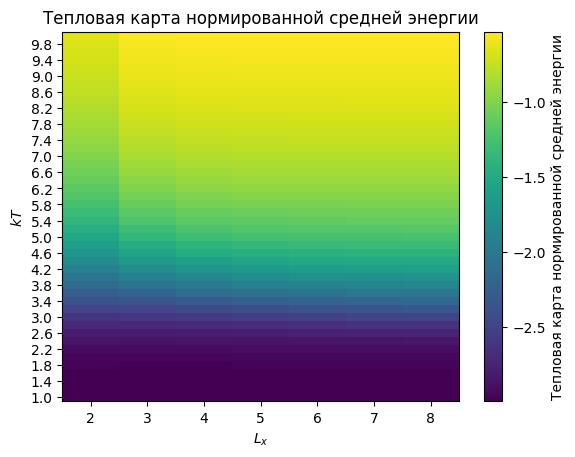

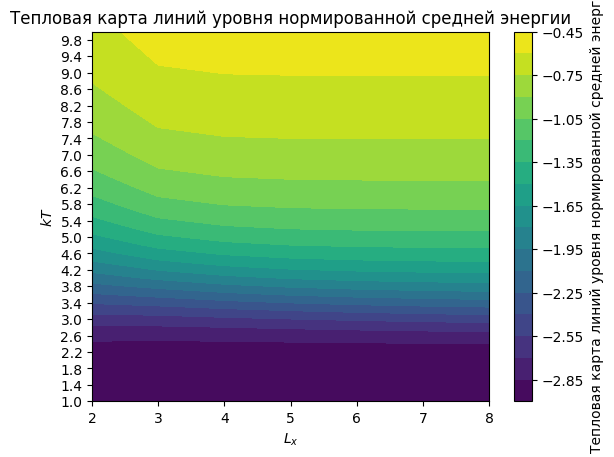

In [ ]:

Lx = np.arange(2, 9)
mean_energies = np.load('mean_energies.npy')

plt.pcolormesh(Lx, kT, mean_energies.T, shading='auto', cmap='viridis')
plt.colorbar(label='Тепловая карта нормированной средней энергии')
plt.xlabel('$L_x$')
plt.ylabel('$kT$')
plt.title('Тепловая карта нормированной средней энергии')
plt.xticks(Lx)
plt.yticks(kT[::2])
plt.show()

# Линии уровня
plt.contourf(Lx, kT, mean_energies.T, levels=20, cmap='viridis')
plt.colorbar(label='Тепловая карта линий уровня нормированной средней энергии')
plt.xlabel('$L_x$')
plt.ylabel('$kT$')
plt.xticks(Lx)
plt.yticks(kT[::2])
plt.title('Тепловая карта линий уровня нормированной средней энергии')
plt.show()


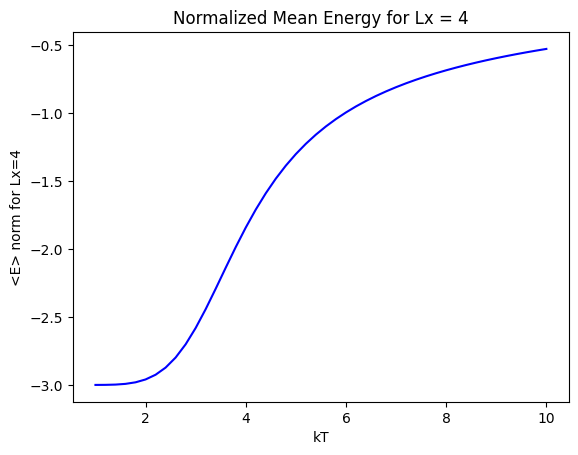

In [ ]:
Lx_index = 2  # Индекс для Lx = 4
plt.plot(kT, mean_energies[Lx_index],  color='b')
plt.xlabel("kT")
plt.ylabel("<E> norm for Lx=4")
plt.title("Normalized Mean Energy for Lx = 4")
plt.show()

Меетод Метрополиса из файлика-доп задание

In [ ]:
import random

@njit
def metropolis_3d(Lx: int, Ly: int, Lz: int, kT: float, steps: int, initial_state: np.ndarray) -> np.ndarray:
    """
    Выполняет steps шагов Метрополиса для системы спинов размером Lx, Ly, Lz

    Параметры:
    ----------
    Lx, Ly, Lz : int Размеры решетки
    kT : float Температура
    steps : int Количество шагов алгоритма Метрополиса
    initial_state : np.ndarray Начальная конфигурация спинов

    Возвращает:
    ----------
    np.ndarray Конфигурация спинов после шагов
    """
    sigma = initial_state.copy()
    beta = 1 / kT
    energies = np.zeros(steps, dtype=np.float64)
    for step in range(steps):
        i, j, k = np.random.randint(0, Lx), np.random.randint(0, Ly), np.random.randint(0, Lz)
        sigma_new = sigma.copy()
        sigma_new[i, j, k] = -sigma_new[i, j, k]
        E_old = energy_njit_3d(sigma, Lx, Ly, Lz)
        E_new = energy_njit_3d(sigma_new, Lx, Ly, Lz)
        dE = E_new - E_old
        if dE < 0 or np.random.rand() < np.exp(-dE * beta):
            sigma = sigma_new
        energies[step] = energy_njit_3d(sigma, Lx, Ly, Lz)
    total_energy = np.mean(energies)
    normalized_energy = total_energy / (Lx * Ly * Lz)
    return sigma, normalized_energy

def mean_energy_metropolis(Lx: int, Ly: int, Lz: int, kT: np.ndarray, steps: int) -> np.ndarray:
    """
    Вычисляет нормированную среднюю энергию для массива температур методом Метрополиса

    Параметры:
    ----------
    Lx, Ly, Lz : int Размеры решетки
    kT : np.ndarray Массив температур
    steps : int Количество шагов

    Возвращает:
    ----------
    np.ndarray Нормированные средние энергии для каждого значения температуры
    """
    mean_energies = np.zeros(kT.size)
    initial_state = np.ones((Lx, Ly, Lz), dtype=np.float64)
    for i, T in enumerate(kT):
        _, normalized_energy = metropolis_3d(Lx, Ly, Lz, T, steps, initial_state)
        mean_energies[i] = normalized_energy
    return mean_energies



использование для Lx=4

In [ ]:
Lx, Ly, Lz = 4, 2, 2
kT = np.arange(1.0, 10.2, 0.2)
steps = 100000

start_time = time.time()
mean_energy = mean_energy_metropolis(Lx, Ly, Lz, kT, steps)
total_time = time.time() - start_time
print(f"Время расчета для Lx={Lx}: {total_time:.4f} секунд")
print("Температуры (kT):", kT)
print("Средняя энергия (Метрополис):", mean_energy)

Время расчета для Lx=4: 2.9953 секунд
Температуры (kT): [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10. ]
Средняя энергия (Метрополис): [-2.999835  -2.99961   -2.9974725 -2.9892575 -2.9840575 -2.95788
 -2.92612   -2.8752425 -2.798105  -2.7101425 -2.5640825 -2.431025
 -2.2251325 -2.1452275 -1.9667675 -1.8440675 -1.66972   -1.58781
 -1.475695  -1.3752675 -1.293455  -1.23885   -1.15684   -1.0932375
 -1.052395  -1.0073525 -0.97052   -0.90131   -0.8692575 -0.8409925
 -0.8036925 -0.7705175 -0.75705   -0.7170475 -0.7088775 -0.693045
 -0.67262   -0.6587925 -0.63384   -0.62724   -0.5938975 -0.581145
 -0.5607    -0.5596975 -0.566485  -0.5336   ]


метод метрополиса медленнее- Время расчета для Lx=4: 0.1981 секунд и методом метрополиса Время расчета для Lx=4: 2.9953 секунд

использование для Lx=5

In [ ]:
Lx, Ly, Lz = 5, 2, 2
kT = np.arange(1.0, 10.2, 0.2)
steps = 10000
mean_energy = mean_energy_metropolis(Lx, Ly, Lz, kT,steps)

print("Температуры (kT):", kT)
print("Средняя энергия (Метрополис):", mean_energy)

Температуры (kT): [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10. ]
Средняя энергия (Метрополис): [-3.      -3.      -2.99748 -2.9928  -2.97798 -2.9711  -2.91262 -2.80624
 -2.84218 -2.71124 -2.61284 -2.32436 -2.31416 -2.15434 -1.94394 -1.78236
 -1.68576 -1.58644 -1.46184 -1.23772 -1.29188 -1.19564 -1.1739  -1.06402
 -0.99106 -1.0052  -0.92828 -0.93838 -0.87036 -0.8915  -0.84988 -0.77796
 -0.81544 -0.68964 -0.71736 -0.69018 -0.65738 -0.60036 -0.63066 -0.5727
 -0.54594 -0.60254 -0.56106 -0.6072  -0.5698  -0.54474]
